In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns; sns.set()

%matplotlib inline

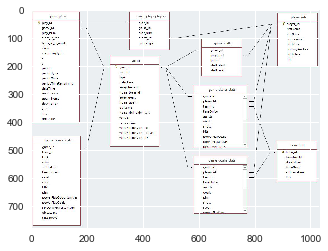

In [87]:
#Display the table relationship diagram
img=mpimg.imread('data/table_relationships.JPG')
imgplot = plt.imshow(img)
plt.show()

In [88]:
#Read in all CSV files from repository
game = pd.read_csv('data/game.csv')
game_goalie_stats = pd.read_csv('data/game_goalie_stats.csv')
game_plays = pd.read_csv('data/game_plays.csv')
game_plays_players = pd.read_csv('data/game_plays_players.csv')
game_shifts = pd.read_csv('data/game_shifts.csv')
game_skater_stats = pd.read_csv('data/game_skater_stats.csv')
game_teams_stats = pd.read_csv('data/game_teams_stats.csv')
player_info = pd.read_csv('data/player_info.csv')
team_info = pd.read_csv('data/team_info.csv')

In [89]:
#create dataframe of goalie with team name and player name
goalie_team = pd.merge(game_goalie_stats, team_info, on = 'team_id')
goalie_team = pd.merge(goalie_team, player_info, on = 'player_id')
#create dataframe of player with team name and player name
skater_team = pd.merge(game_skater_stats, team_info, on = 'team_id')
skater_team = pd.merge(skater_team, player_info, on = 'player_id')

In [90]:
skater_team.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'franchiseId', 'shortName', 'teamName', 'abbreviation', 'link_x',
       'firstName', 'lastName', 'nationality', 'birthCity', 'primaryPosition',
       'birthDate', 'link_y'],
      dtype='object')

In [91]:
game_plays.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side'],
      dtype='object')

In [92]:
game_plays.describe()

,game_id,play_num,team_id_for,team_id_against,x,y,period,periodTime,periodTimeRemaining,goals_away,goals_home,st_x,st_y
count,2.369646e+06,2.369646e+06,1.907922e+06,1.907922e+06,1.903140e+06,1.903157e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,2.369646e+06,1.903140e+06,1.903157e+06
mean,2.014707e+09,1.648367e+02,1.762862e+01,1.755894e+01,2.861891e-01,-2.097951e-01,2.026005e+00,5.857356e+02,5.979063e+02,1.194952e+00,1.322649e+00,8.497122e+00,1.519691e-01
std,1.635618e+06,9.749416e+01,1.229775e+01,1.228052e+01,6.428901e+01,2.307910e+01,8.716109e-01,3.659118e+02,3.639756e+02,1.285669e+00,1.379465e+00,6.372565e+01,2.307955e+01
min,2.012020e+09,1.000000e+00,1.000000e+00,1.000000e+00,-9.900000e+01,-4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-4.200000e+01
25%,2.013021e+09,8.200000e+01,8.000000e+00,8.000000e+00,-6.900000e+01,-2.200000e+01,1.000000e+00,2.650000e+02,2.820000e+02,0.000000e+00,0.000000e+00,-6.300000e+01,-2.200000e+01
50%,2.015020e+09,1.630000e+02,1.600000e+01,1.600000e+01,0.000000e+00,0.000000e+00,2.000000e+00,5.790000e+02,5.980000e+02,1.000000e+00,1.000000e+00,3.000000e+01,0.000000e+00
75%,2.016021e+09,2.440000e+02,2.400000e+01,2.400000e+01,6.900000e+01,2.200000e+01,3.000000e+00,9.030000e+02,9.140000e+02,2.000000e+00,2.000000e+00,6.900000e+01,2.200000e+01
max,2.017030e+09,6.810000e+02,5.400000e+01,5.400000e+01,9.900000e+01,4.200000e+01,6.000000e+00,1.200000e+03,1.200000e+03,9.000000e+00,1.000000e+01,9.900000e+01,4.200000e+01


In [93]:
#My computer cannot process this command - Out of Memory Error
#game_plays = pd.merge(game_plays, game_plays_players, on = 'play_num', how = 'outer')

In [94]:
#Remove nan x positions
game_plays_position = game_plays[np.isfinite(game_plays['x'])]

#Convert a column to a datetime object
game_plays_position['dateTime'] = pd.to_datetime(game_plays_position['dateTime'])
#Create column of years from datetime Series
game_plays_position['year'] = game_plays_position['dateTime'].dt.year

C:\Users\bbiseda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\bbiseda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [95]:
game_plays_position.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side,year
6,2012030221_4,2012030221,4,6.0,3.0,Faceoff,NaN,0.0,0.0,1,...,0,1200,2013-05-16 23:40:15,0,0,Patrice Bergeron faceoff won against Derek Stepan,0.0,0.0,left,2013
7,2012030221_5,2012030221,5,3.0,6.0,Hit,NaN,-92.0,30.0,1,...,30,1170,2013-05-16 23:40:49,0,0,Carl Hagelin hit Adam McQuaid,92.0,-30.0,right,2013
8,2012030221_6,2012030221,6,6.0,3.0,Blocked Shot,NaN,-73.0,8.0,1,...,35,1165,2013-05-16 23:40:53,0,0,Matt Bartkowski blocked shot from Derick Brassard,-73.0,8.0,left,2013
9,2012030221_7,2012030221,7,3.0,6.0,Hit,NaN,92.0,33.0,1,...,42,1158,2013-05-16 23:41:01,0,0,Michael Del Zotto hit Patrice Bergeron,-92.0,-33.0,right,2013
10,2012030221_8,2012030221,8,6.0,3.0,Takeaway,NaN,21.0,20.0,1,...,57,1143,2013-05-16 23:41:16,0,0,Takeaway by Nathan Horton,21.0,20.0,left,2013


In [96]:
#Free up some memory
del game_shifts
del game_plays
del game_plays_players

In [97]:
#lets only look at hits
game_plays_goals = game_plays_position[game_plays_position['event'] == 'Goal'] 
game_plays_hits = game_plays_position[game_plays_position['event'] == 'Hit']


In [98]:
game_plays_goals.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side', 'year'],
      dtype='object')

In [99]:
game_plays_goals.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side,year
198,2012030221_197,2012030221,197,6.0,3.0,Goal,Slap Shot,-41.0,-1.0,2,...,743,457,2013-05-17 00:57:50,0,1,"Zdeno Chara (2) Slap Shot, assists: David Krej...",41.0,1.0,right,2013
242,2012030221_241,2012030221,241,3.0,6.0,Goal,Snap Shot,35.0,33.0,2,...,1198,2,2013-05-17 01:10:18,1,1,"Ryan McDonagh (1) Snap Shot, assists: Rick Nas...",35.0,33.0,left,2013
250,2012030221_248,2012030221,248,3.0,6.0,Goal,Snap Shot,-58.0,-1.0,3,...,14,1186,2013-05-17 01:29:59,2,1,"Derek Stepan (3) Snap Shot, assists: Carl Hage...",58.0,1.0,right,2013
263,2012030221_261,2012030221,261,6.0,3.0,Goal,Slap Shot,43.0,28.0,3,...,175,1025,2013-05-17 01:35:09,2,2,"Torey Krug (1) Slap Shot, assists: Dougie Hami...",43.0,28.0,left,2013
431,2012030221_430,2012030221,430,6.0,3.0,Goal,Tip-In,-77.0,-4.0,4,...,940,260,2013-05-17 02:46:57,2,3,"Brad Marchand (1) Tip-In, assists: Patrice Ber...",77.0,4.0,right,2013


In [100]:
#Seems like there is some issue with data type per some reading online.  Needs to be float not an object
cols = ['x', 'y']
game_plays_position[cols] = game_plays_position[cols].astype(float)

In [101]:
game_plays_position.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side,year
6,2012030221_4,2012030221,4,6.0,3.0,Faceoff,NaN,0.0,0.0,1,...,0,1200,2013-05-16 23:40:15,0,0,Patrice Bergeron faceoff won against Derek Stepan,0.0,0.0,left,2013
7,2012030221_5,2012030221,5,3.0,6.0,Hit,NaN,-92.0,30.0,1,...,30,1170,2013-05-16 23:40:49,0,0,Carl Hagelin hit Adam McQuaid,92.0,-30.0,right,2013
8,2012030221_6,2012030221,6,6.0,3.0,Blocked Shot,NaN,-73.0,8.0,1,...,35,1165,2013-05-16 23:40:53,0,0,Matt Bartkowski blocked shot from Derick Brassard,-73.0,8.0,left,2013
9,2012030221_7,2012030221,7,3.0,6.0,Hit,NaN,92.0,33.0,1,...,42,1158,2013-05-16 23:41:01,0,0,Michael Del Zotto hit Patrice Bergeron,-92.0,-33.0,right,2013
10,2012030221_8,2012030221,8,6.0,3.0,Takeaway,NaN,21.0,20.0,1,...,57,1143,2013-05-16 23:41:16,0,0,Takeaway by Nathan Horton,21.0,20.0,left,2013


In [102]:
#By season, by game_id
season_scores = game_plays_position.groupby(['year', 'game_id'])[['goals_home', 'goals_away']].max()
season_scores.groupby('year')[['goals_home', 'goals_away']].mean()

,goals_home,goals_away
year,,
2013,2.802888,2.476534
2014,2.830806,2.525140
2015,2.740941,2.516577
2016,2.803089,2.548263
2017,2.944694,2.646487
2018,3.068365,2.843164


C:\Users\bbiseda\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


Text(0.5,0.98,'Player Position When Scoring Regular time')

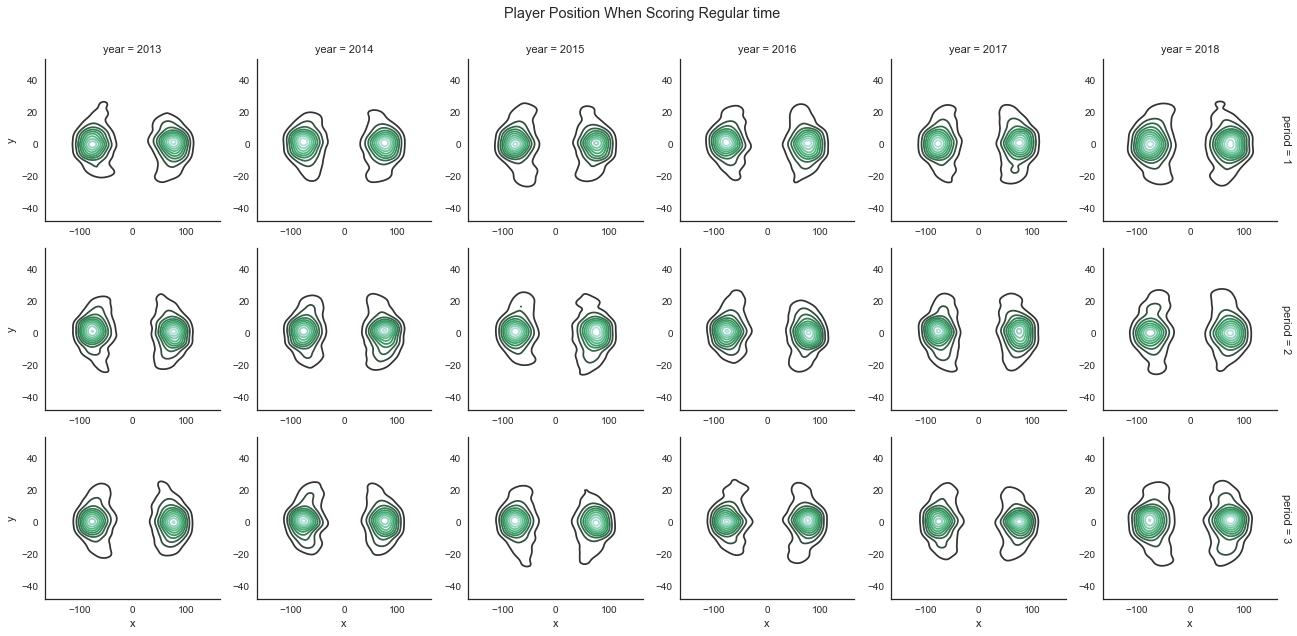

In [110]:
#Let's look at where all the Goals have occurred on the ice during regular game play time only (periods 1 - 3)
reg_time = game_plays_goals[game_plays_goals['period'] <=3]

#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
g = sns.FacetGrid(reg_time, col = "year", row = 'period', margin_titles=True)
g.map(sns.kdeplot, 'x', 'y')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Player Position When Scoring Regular time')

#We can iterate through the various subplots to change labels and titles if we want

#axes = g.axes.flatten()
#axes[1].set_title('Player Position When Scoring Regular time')
#axes[1].set_ylabel('Y coordinate')
#axes[1].set_xlabel('X coordinate')

# It will be necessary to figure out how to identify the scoring team for each play.  I think thats in the gameshifts table and we can join on home team with the list of players scoring or with a regex expression

In [ ]:
home_game_plays_goals = 
away_game_plays_goals = 

In [ ]:
#Let's look at where all the Goals have occurred on the ice
#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
ax = sns.FacetGrid(game_plays_goals, col = "year")
ax.map(sns.kdeplot, 'x', 'y')

#ax = sns.kdeplot(game_plays_goals['x'], game_plays_goals['y'])
ax.set_title('Home Team Player Position When Scoring')
ax.set_ylabel('Y coordinate')
ax.set_xlabel('X coordinate')

In [ ]:
#Let's look at where all the Goals have occurred on the ice
#This took forever to run on my computer but eventually showed up!
sns.set(style = 'white')
ax = sns.FacetGrid(game_plays_goals, col = "year")
ax.map(sns.kdeplot, 'x', 'y')

#ax = sns.kdeplot(game_plays_goals['x'], game_plays_goals['y'])
ax.set_title('Away Team Player Position When Scoring')
ax.set_ylabel('Y coordinate')
ax.set_xlabel('X coordinate')

In [20]:
who

ax	 cols	 game	 game_goalie_stats	 game_plays_goals	 game_plays_hits	 game_plays_position	 game_skater_stats	 game_teams_stats	 
goalie_team	 img	 imgplot	 mpimg	 np	 pd	 player_info	 plt	 season_scores	 
skater_team	 sns	 team_info	 


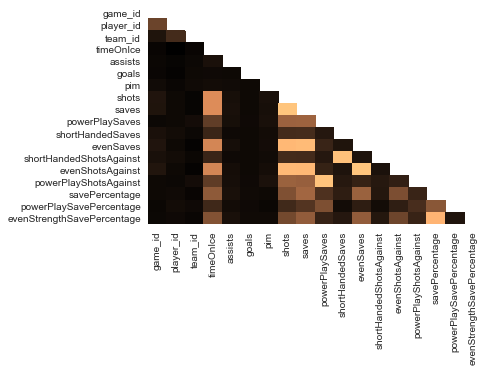

In [21]:
#Goalie Stats Correlation Heatmap
c = game_goalie_stats.corr()
mask = np.ones_like(c)
mask = np.triu(mask)
sns.set(style = 'white')
sns.heatmap(c, cmap = 'copper', mask=mask, cbar=False)

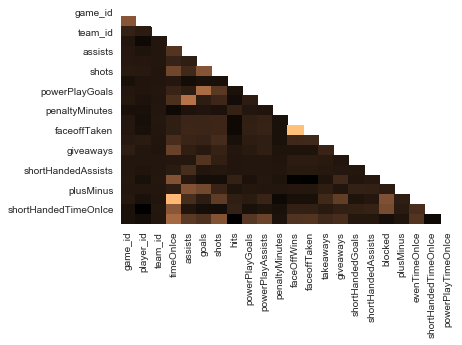

In [22]:
#Player Stats Correlation Heatmap
c = game_skater_stats.corr()
mask = np.ones_like(c)
mask = np.triu(mask)
sns.set(style = 'white')
sns.heatmap(c, cmap = 'copper', mask=mask, cbar=False)

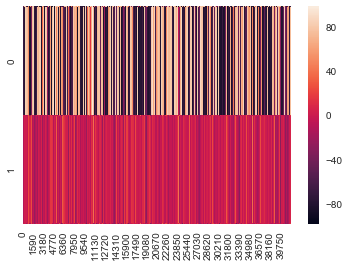

In [23]:
ax = sns.heatmap((game_plays_goals['x'], game_plays_goals['y']))

In [24]:
#Let's see what variables are out here
%who

ax	 c	 cols	 game	 game_goalie_stats	 game_plays_goals	 game_plays_hits	 game_plays_position	 game_skater_stats	 
game_teams_stats	 goalie_team	 img	 imgplot	 mask	 mpimg	 np	 pd	 player_info	 
plt	 season_scores	 skater_team	 sns	 team_info	 


AttributeError: 'JointGrid' object has no attribute 'set_title'

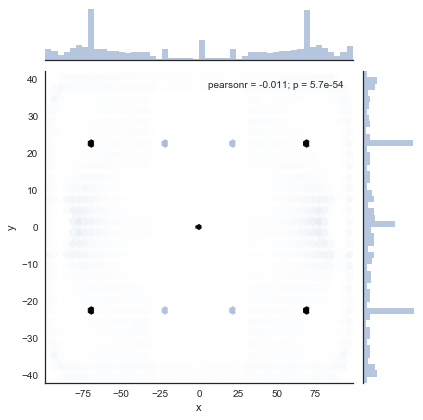

In [25]:
#Where do hits occur on the ice
ax = sns.jointplot('x', 'y', data=game_plays_position, kind="hex")
ax.set_title('Player Position When Hitting')
ax.set_ylabel('Y coordinate')
ax.set_xlabel('X coordinate')

In [ ]:
#How about goals?
sns.jointplot('x', 'y', data=game_plays_goals, kind="hex")

The above graph is assymetrical along the y axis.  It would appear that there is some bias in terms of handedness?

In [ ]:
#Test this line
#sns.jointplot('x', 'y', data=game_plays_position, kind="kde")

# This linke has some nice visualizations we could try 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

Heat maps:

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
#Just plot 1000 points because it takes forever
#This visualization style could be good but I can't get this to work correctly
g = sns.heatmap([game_plays_position[:1000]['x'], game_plays_position[:1000]['y']])

In [ ]:
#Not working correctly

#g = sns.JointGrid('x','y', data = game_plays_position)
#g = g.plot_joint(plt.scatter, color='0.5', edgecolor='white')
#g = g.plot_joint(sns.kdeplot, zorder=0, n_levels=6)
#g = g.plot_marginals(sns.kdeplot, shades=True)

In [26]:
skater_team.groupby('teamName').mean()['shots']

teamName
Avalanche         1.598631
Blackhawks        1.790158
Blue Jackets      1.678713
Blues             1.660202
Bruins            1.795207
Canadiens         1.682508
Canucks           1.624718
Capitals          1.664878
Coyotes           1.621422
Devils            1.514399
Ducks             1.683023
Flames            1.609584
Flyers            1.692872
Golden Knights    1.805556
Hurricanes        1.741568
Islanders         1.730867
Jets              1.687196
Kings             1.722083
Lightning         1.653609
Maple Leafs       1.669572
Oilers            1.637018
Panthers          1.727458
Penguins          1.787052
Predators         1.700780
Rangers           1.708486
Red Wings         1.645949
Sabres            1.570805
Senators          1.715123
Sharks            1.762894
Stars             1.706499
Wild              1.629662
Name: shots, dtype: float64

(array([1., 1., 1., 4., 3., 7., 5., 4., 1., 4.]),
 array([1.51439885, 1.54351452, 1.57263019, 1.60174586, 1.63086153,
        1.6599772 , 1.68909287, 1.71820854, 1.74732421, 1.77643988,
        1.80555556]),
 <a list of 10 Patch objects>)

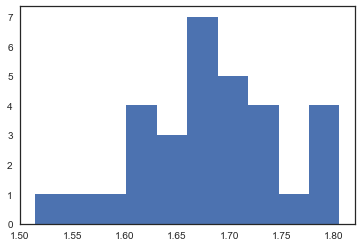

In [27]:
#Group by team
by_team = skater_team.groupby('teamName').mean()
plt.hist(skater_team.groupby('teamName').mean()['shots'])#.plot(legend=True)

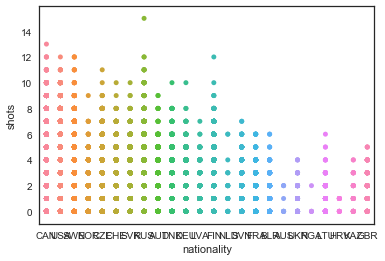

In [28]:
g = sns.stripplot(x='nationality', y = 'shots', data=skater_team)

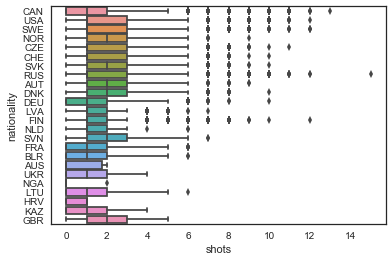

In [29]:
g = sns.boxplot(x='shots', y='nationality', data=skater_team)

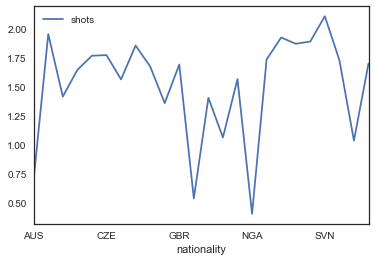

In [30]:
#Group skaters by nationality
by_country = skater_team.groupby('nationality').mean()
skater_team.groupby('nationality').mean()['shots'].plot(legend=True)


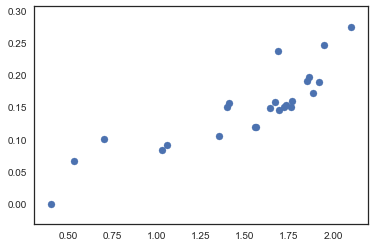

In [31]:
plt.scatter(by_country['shots'],by_country['goals'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170007643C8>]],
      dtype=object)

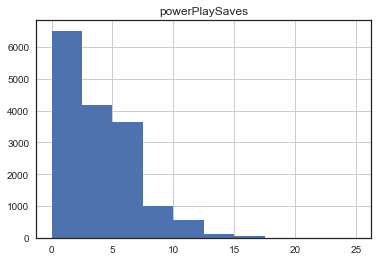

In [32]:
goalie_team.hist('powerPlaySaves')

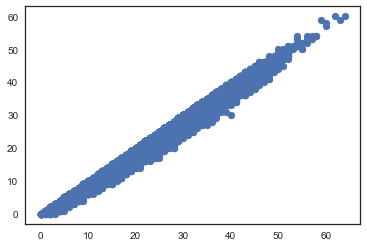

In [33]:
plt.scatter(goalie_team['shots'], goalie_team['saves'])

In [34]:
game_goalie_stats

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2012030221,8468685,3,4540,0,0,0,48,45,10,1,34,1,36,11,L,93.750000,90.909091,94.444444
1,2012030221,8471695,6,4540,0,0,0,35,33,3,0,30,0,32,3,W,94.285714,100.000000,93.750000
2,2012030222,8468685,3,3600,0,0,0,32,27,1,2,24,2,29,1,L,84.375000,100.000000,82.758621
3,2012030222,8471695,6,3600,0,0,0,37,35,7,1,27,1,29,7,W,94.594595,100.000000,93.103448
4,2012030223,8471695,6,3600,0,0,0,24,23,2,0,21,0,22,2,W,95.833333,100.000000,95.454545
5,2012030223,8468685,3,3534,0,0,0,34,32,0,0,32,0,34,0,L,94.117647,NaN,94.117647
6,2012030224,8471695,6,4019,0,0,0,32,28,5,1,22,1,25,6,L,87.500000,83.333333,88.000000
7,2012030224,8468685,3,4023,0,0,0,40,37,6,0,31,0,32,8,W,92.500000,75.000000,96.875000
8,2012030225,8468685,3,3547,0,0,0,31,29,2,2,25,2,26,3,L,93.548387,66.666667,96.153846
9,2012030225,8471695,6,3600,0,0,0,29,28,1,2,25,2,25,2,W,96.551724,50.000000,100.000000
